In [21]:
import pandas as pd
import numpy as np
import json

In [22]:
instrument, granularity = "EUR_USD", "M15"
filename = r'C:\Users\vcucu\Documents\KTH_Q1\II2202 Research Methodology and Scientific Writing\tmp\One_{}_{}.json'.format(instrument, granularity)

input_file = open (filename)
json_array = json.load(input_file)


In [23]:
json_array[0]['bid']['o']

'1.10482'

In [24]:
candles_list = []
for item in json_array:
    candle_details = {"complete":None, "volume":None, "time":None, "b_o":None, "b_h":None, "b_l":None, "b_c":None, "a_o":None, "a_h":None, "a_l":None, "a_c":None}
    candle_details['complete'] = item['complete']
    candle_details['volume'] = item['volume']
    candle_details['time'] = item['time']
    candle_details['b_o'] = item['bid']['o']
    candle_details['b_h'] = item['bid']['h']
    candle_details['b_l'] = item['bid']['l']
    candle_details['b_c'] = item['bid']['c']
    candle_details['a_o'] = item['ask']['o']
    candle_details['a_h'] = item['ask']['h']
    candle_details['a_l'] = item['ask']['l']
    candle_details['a_c'] = item['ask']['c']
    candles_list.append(candle_details)

print(candles_list)

[{'complete': True, 'volume': 236, 'time': '2019-09-18T10:00:00.000000000Z', 'b_o': '1.10482', 'b_h': '1.10516', 'b_l': '1.10473', 'b_c': '1.10514', 'a_o': '1.10495', 'a_h': '1.10529', 'a_l': '1.10485', 'a_c': '1.10527'}, {'complete': True, 'volume': 139, 'time': '2019-09-18T10:15:00.000000000Z', 'b_o': '1.10512', 'b_h': '1.10512', 'b_l': '1.10465', 'b_c': '1.10465', 'a_o': '1.10524', 'a_h': '1.10524', 'a_l': '1.10477', 'a_c': '1.10477'}, {'complete': True, 'volume': 211, 'time': '2019-09-18T10:30:00.000000000Z', 'b_o': '1.10463', 'b_h': '1.10472', 'b_l': '1.10438', 'b_c': '1.10457', 'a_o': '1.10474', 'a_h': '1.10484', 'a_l': '1.10450', 'a_c': '1.10468'}, {'complete': True, 'volume': 155, 'time': '2019-09-18T10:45:00.000000000Z', 'b_o': '1.10454', 'b_h': '1.10461', 'b_l': '1.10425', 'b_c': '1.10433', 'a_o': '1.10466', 'a_h': '1.10473', 'a_l': '1.10437', 'a_c': '1.10445'}, {'complete': True, 'volume': 158, 'time': '2019-09-18T11:00:00.000000000Z', 'b_o': '1.10431', 'b_h': '1.10445', 'b_

In [25]:
df = pd.DataFrame(candles_list).set_index('time')

In [26]:
df.to_csv('df_M15.csv')

In [27]:
df.head()

,a_c,a_h,a_l,a_o,b_c,b_h,b_l,b_o,complete,volume
time,,,,,,,,,,
2019-09-18T10:00:00.000000000Z,1.10527,1.10529,1.10485,1.10495,1.10514,1.10516,1.10473,1.10482,True,236
2019-09-18T10:15:00.000000000Z,1.10477,1.10524,1.10477,1.10524,1.10465,1.10512,1.10465,1.10512,True,139
2019-09-18T10:30:00.000000000Z,1.10468,1.10484,1.10450,1.10474,1.10457,1.10472,1.10438,1.10463,True,211
2019-09-18T10:45:00.000000000Z,1.10445,1.10473,1.10437,1.10466,1.10433,1.10461,1.10425,1.10454,True,155
2019-09-18T11:00:00.000000000Z,1.10428,1.10458,1.10418,1.10442,1.10416,1.10445,1.10406,1.10431,True,158


In [28]:
df = df.astype('float')
type(df["a_c"][0])

numpy.float64

In [29]:
df['returns'] = np.log(df['a_c'] / df['a_c'].shift(1))


C:\Users\vcucu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sign
  """


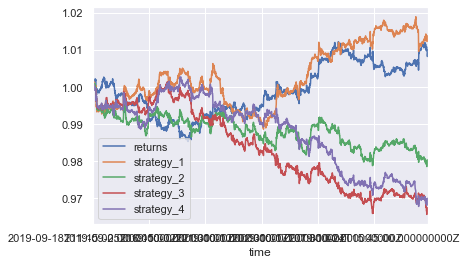

In [30]:
cols = []  # 13

for momentum in [1, 2, 3, 4]:  # 14
    col = 'position_%s' % momentum  # 15
    df[col] = np.sign(df['returns'].rolling(momentum).mean())  # 16
    cols.append(col)  # 17

%matplotlib inline
import seaborn as sns; sns.set()  # 18

strats = ['returns']  # 19

for col in cols:  # 20
    strat = 'strategy_%s' % col.split('_')[1]  # 21
    df[strat] = df[col].shift(1) * df['returns']  # 22
    strats.append(strat)  # 23

df[strats].dropna().cumsum().apply(np.exp).plot()  # 24

In [20]:
df

,a_c,a_h,a_l,a_o,b_c,b_h,b_l,b_o,complete,volume,returns,position_15,position_30,position_60,position_120,strategy_15,strategy_30,strategy_60,strategy_120
time,,,,,,,,,,,,,,,,,,,
2019-09-18T10:00:00.000000000Z,1.10527,1.10529,1.10485,1.10495,1.10514,1.10516,1.10473,1.10482,1.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18T10:15:00.000000000Z,1.10477,1.10524,1.10477,1.10524,1.10465,1.10512,1.10465,1.10512,1.0,139.0,-0.000452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18T10:30:00.000000000Z,1.10468,1.10484,1.10450,1.10474,1.10457,1.10472,1.10438,1.10463,1.0,211.0,-0.000081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18T10:45:00.000000000Z,1.10445,1.10473,1.10437,1.10466,1.10433,1.10461,1.10425,1.10454,1.0,155.0,-0.000208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18T11:00:00.000000000Z,1.10428,1.10458,1.10418,1.10442,1.10416,1.10445,1.10406,1.10431,1.0,158.0,-0.000154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18T11:15:00.000000000Z,1.10440,1.10483,1.10409,1.10431,1.10428,1.10472,1.10397,1.10418,1.0,204.0,0.000109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18T11:30:00.000000000Z,1.10479,1.10487,1.10437,1.10442,1.10467,1.10473,1.10426,1.10431,1.0,174.0,0.000353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18T11:45:00.000000000Z,1.10521,1.10529,1.10479,1.10481,1.10509,1.10517,1.10467,1.10469,1.0,221.0,0.000380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-18T12:00:00.000000000Z,1.10534,1.10552,1.10516,1.10524,1.10522,1.10540,1.10504,1.10512,1.0,165.0,0.000118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
